In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [41]:
from collections import defaultdict
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [25]:
iris = pd.read_csv('Iris.csv')

In [26]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [32]:
#finding different class labels 
np.unique(iris['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
iris.shape

(150, 6)

In [34]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:>

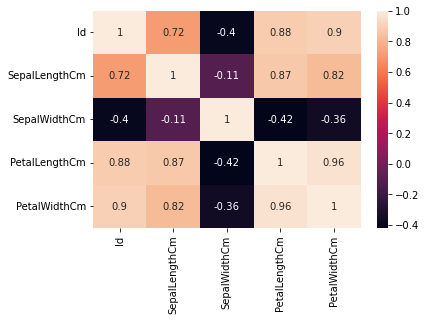

In [36]:
#finding correlation of features 
correl = iris.corr()
sns.heatmap(correl,annot=True)

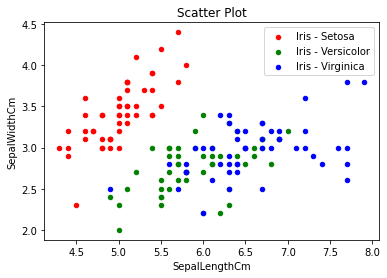

In [37]:
# We can see from the example above that lighter colours are used to represent larger values.
# For the heatmap, this observation will always remain the same.
# Lighter values will always be greater than darker values.

# We will now create a scatter plot with Matplotlib.

ax = iris[iris['Species'] == 'Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                        color='red', label='Iris - Setosa')
iris[iris['Species'] == 'Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                        color='green', label='Iris - Versicolor', ax=ax)
iris[iris['Species'] == 'Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                       color='blue', label='Iris - Virginica', ax=ax)

ax.set_title("Scatter Plot")
plt.show()

In [39]:
#checking for Null values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [42]:
#Label Encoding - for encoding categorical features into numerical ones
encoder = LabelEncoder()
iris['Species'] = encoder.fit_transform(iris['Species'])

In [43]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [44]:
#finding different class labels 
np.unique(iris['Species'])

array([0, 1, 2])

In [57]:
# We drop ‘ID’ as this feature is insignificant. 
#DROPPING ID 
iris = iris.drop(['Id'], axis = 1)

In [58]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [61]:
# Function to calculate euclidean distance

def euclidean_dis(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [79]:
# KMeans Implementation

from collections import defaultdict

iris=datasets.load_iris()

X=pd.DataFrame(iris.data,columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y=pd.DataFrame(iris.target,columns=['Classes'])
X['species'] = pd.Series(np.random.randn(150), index=X.index)
X['species'][y['Classes']==0]='Setosa'
X['species'][y['Classes']==1]='versicolor'
X['species'][y['Classes']==2]='virginica'

clusters=len(np.unique(y))

class KMeans:
    
    def __init__(self,data,k,max_ite):
        self.data=data
        self.k=k
        self.max_ite=max_ite
        
    def predict(self):

        centroids = defaultdict(int)
        
        K=self.k
        max_iter=self.max_ite
        
        for i in range(K):
            centroids[i] = self.data[i]



        r=0


        for i in range(max_iter):
            r=r+1
            classes=defaultdict(list)
            
            for key in range(K):
                classes[key]=[]
            for datapoint in self.data:
                distance=[]
                for j in range(K):

                    dis=euclidean_dis(datapoint,centroids[j])

                    distance.append(dis)
                mindis=min(distance)

                index=distance.index(mindis)
                classes[index].append(datapoint)
                old_centroid=dict(centroids)

            for t in range(K):
                class_=classes[t]


                new_centroid=np.mean(class_,axis=0)
                centroids[t]=new_centroid
            flg=1
            for t in range(K):

                a=centroids[t]
                b=old_centroid[t]
                if np.sum((a - b)/b * 100) > 0.001:
                    flg = 0



            if flg==1:
                break


        return classes,centroids

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34040\1587155969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['species'][y['Classes']==1]='versicolor'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34040\1587155969.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['species'][y['Classes']==2]='virginica'


In [75]:
kmeans=KMeans(iris.data[:,:4],clusters,10000)

classes,centroids=kmeans.predict()


for i in range(0,3):
    classes[i]=np.array(classes[i]).tolist()
    
for i in range(0,3):
    print(len(classes[i]))
print(centroids)

39
61
50
defaultdict(<class 'int'>, {0: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), 1: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), 2: array([5.006, 3.428, 1.462, 0.246])})


In [78]:
class0=[]
class1=[]
class2=[]

for i in range(len(iris.target)):
    if iris.target[i]==0:
        class0.append(iris.data[i])
    elif iris.target[i]==1:
        class1.append(iris.data[i])
    elif iris.target[i]==2:
        class2.append(iris.data[i])


class0=np.array(class0).tolist()
class1=np.array(class1).tolist()
class2=np.array(class2).tolist()


# utility function

def subset(array1,array2):
    flg=0
    for i in range(len(array1)):
        if(array2==array1[i]):
            flg=1
            break
    if(flg==1):
        return True
    else:
        return False
    

# confusion matrix
    
def confusion_matrix(a,b,c,classes,):
    
    cm=[[0 for i in range(y.Classes.nunique())] for i in range(y.Classes.nunique())]

    for element in a:

        if subset(classes[2],element):
            cm[0][0]=cm[0][0]+1
        elif subset(classes[1],element):
            cm[0][1]=cm[0][1]+1
        elif subset(classes[0],element):
            cm[0][2]=cm[0][2]+1

    for element in b:

        if subset(classes[2],element):
            cm[1][0]=cm[1][0]+1
        elif subset(classes[1],element):
            cm[1][1]=cm[1][1]+1
        elif subset(classes[0],element):
            cm[1][2]=cm[1][2]+1

    for element in c:

        if subset(classes[2],element):

            cm[2][0]=cm[2][0]+1
        elif subset(classes[1],element):

            cm[2][1]=cm[2][1]+1
        elif subset(classes[0],element):

            cm[2][2]=cm[2][2]+1
            
    return cm


# performance metrics
            
class Metrics:
    
    def __init__(self,confusion_m):
        self.confusion_m=confusion_m
        self.total=np.sum(confusion_m)
        self.diagonal=np.sum(np.diag(confusion_m))
    
    def accuracy(self):
        accuracy=(self.diagonal/self.total)
        return accuracy
    
    def recall(self):
        recall=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=1)
        recall=np.mean(recall)
        return recall
    
    def precision(self):
        precision=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=0)
        precision=np.mean(precision)
        return precision
    
    def f1_score(self,precision,recall):
        f1_score=(2*precision*recall)/(precision+recall)
        
        return f1_score

In [68]:
matrix=confusion_matrix(class0,class1,class2,classes)
performance=Metrics(matrix)

accuracy=performance.accuracy()
recall=performance.recall()
precision=performance.precision()
f1_score=performance.f1_score(precision,recall)

print('confusion matrix is:',end='\n')
print(np.array(matrix),end='\n')

print("Accuracy of the model is {}".format(accuracy*100))
print("Recall of the model is {}".format(recall*100))
print("Precision of the model is {}".format(precision*100))
print("F1-Score of the model is {}".format(f1_score*100))

confusion matrix is:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
Accuracy of the model is 88.66666666666667
Recall of the model is 88.66666666666667
Precision of the model is 89.78562421185372
F1-Score of the model is 89.22263731397425
